In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import reuters
import seaborn as sns

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train_data, x_train_labels, y_train_data, y_train_labels = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(x_train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
6736
2246
46


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(x_train_data)
x_test = one_hot_encoding(test_data)
y_val = one_hot_encoding(y_train_data)
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_val = to_categorical(y_train_data)

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
import tensorflow as tf

model = models.Sequential()
model.add(layers.Dense(64, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=32,
                               validation_data=(x_test, y_test))

model.summary()

Epoch 1/40
281/281 [==============================] - 4s 11ms/step - loss: 1.6908 - accuracy: 0.6152 - val_loss: 1.2872 - val_accuracy: 0.7191
Epoch 2/40
281/281 [==============================] - 3s 11ms/step - loss: 1.1022 - accuracy: 0.7401 - val_loss: 1.0911 - val_accuracy: 0.7573
Epoch 3/40
281/281 [==============================] - 3s 10ms/step - loss: 0.8938 - accuracy: 0.7829 - val_loss: 1.0359 - val_accuracy: 0.7792
Epoch 4/40
281/281 [==============================] - 3s 10ms/step - loss: 0.7686 - accuracy: 0.8134 - val_loss: 1.0575 - val_accuracy: 0.7845
Epoch 5/40
281/281 [==============================] - 3s 12ms/step - loss: 0.6876 - accuracy: 0.8349 - val_loss: 1.0389 - val_accuracy: 0.7894
Epoch 6/40
281/281 [==============================] - 3s 11ms/step - loss: 0.6232 - accuracy: 0.8520 - val_loss: 1.0883 - val_accuracy: 0.7872
Epoch 7/40
281/281 [==============================] - 4s 13ms/step - loss: 0.5536 - accuracy: 0.8626 - val_loss: 1.1294 - val_accuracy: 0.7907

In [5]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')

history = model.fit(x_train, y_train, epochs=20,
                    callbacks=[check_point_cb])

Epoch 1/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2880 - accuracy: 0.9250
Epoch 2/20
281/281 [==============================] - 4s 13ms/step - loss: 0.2872 - accuracy: 0.9264
Epoch 3/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2714 - accuracy: 0.9273
Epoch 4/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2879 - accuracy: 0.9236
Epoch 5/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2862 - accuracy: 0.9274
Epoch 6/20
281/281 [==============================] - 4s 13ms/step - loss: 0.2755 - accuracy: 0.9281
Epoch 7/20
281/281 [==============================] - 4s 13ms/step - loss: 0.2844 - accuracy: 0.9280
Epoch 8/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2693 - accuracy: 0.9238
Epoch 9/20
281/281 [==============================] - 4s 15ms/step - loss: 0.2790 - accuracy: 0.9282
Epoch 10/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2815 - accura

In [6]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/20
281/281 [==============================] - 5s 18ms/step - loss: 0.2497 - accuracy: 0.9351 - val_loss: 0.0903 - val_accuracy: 0.9685
Epoch 2/20
281/281 [==============================] - 4s 15ms/step - loss: 0.2499 - accuracy: 0.9348 - val_loss: 0.0899 - val_accuracy: 0.9682
Epoch 3/20
281/281 [==============================] - 4s 16ms/step - loss: 0.2490 - accuracy: 0.9342 - val_loss: 0.0850 - val_accuracy: 0.9676
Epoch 4/20
281/281 [==============================] - 5s 17ms/step - loss: 0.2438 - accuracy: 0.9380 - val_loss: 0.0838 - val_accuracy: 0.9675
Epoch 5/20
281/281 [==============================] - 4s 15ms/step - loss: 0.2526 - accuracy: 0.9336 - val_loss: 0.0864 - val_accuracy: 0.9681
Epoch 6/20
281/281 [==============================] - 4s 16ms/step - loss: 0.2393 - accuracy: 0.9351 - val_loss: 0.0840 - val_accuracy: 0.9679
Epoch 7/20
281/281 [==============================] - 5s 16ms/step - loss: 0.2385 - accuracy: 0.9349 - val_loss: 0.0848 - val_accuracy: 0.9685

In [7]:
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history2 = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
281/281 [==============================] - 3s 12ms/step - loss: 0.2464 - accuracy: 0.9369 - val_loss: 0.0805 - val_accuracy: 0.9685
Epoch 2/20
281/281 [==============================] - 3s 12ms/step - loss: 0.2353 - accuracy: 0.9392 - val_loss: 0.0833 - val_accuracy: 0.9676
Epoch 3/20
281/281 [==============================] - 3s 12ms/step - loss: 0.2357 - accuracy: 0.9377 - val_loss: 0.0796 - val_accuracy: 0.9681
Epoch 4/20
281/281 [==============================] - 3s 12ms/step - loss: 0.2481 - accuracy: 0.9360 - val_loss: 0.0788 - val_accuracy: 0.9682
Epoch 5/20
281/281 [==============================] - 3s 12ms/step - loss: 0.2373 - accuracy: 0.9388 - val_loss: 0.0779 - val_accuracy: 0.9685
Epoch 6/20
281/281 [==============================] - 4s 14ms/step - loss: 0.2312 - accuracy: 0.9397 - val_loss: 0.0812 - val_accuracy: 0.9681
Epoch 7/20
281/281 [==============================] - 4s 13ms/step - loss: 0.2255 - accuracy: 0.9393 - val_loss: 0.0789 - val_accuracy: 0.9684

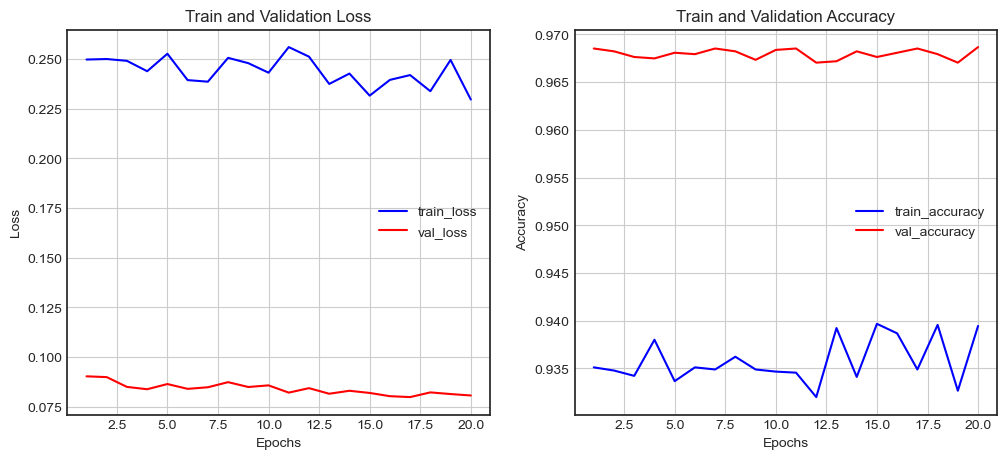

In [8]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.8656 - accuracy: 0.7854


[1.8656160831451416, 0.7853962779045105]

# 회고

### 모델 학습을 통해 실제값과 거의 비슷한 값을 얻어낼 수 있었다.
### 우선 노드에 나온 순서대로 코드를 작성하여 값을 얻어 내었다.
### 노드에 나온 순서대로 하다보니 수치를 수십번 조정하여 원하던 그래프를 얻어 낼수 있었다.(batch_size가 제일 영향이 높음)
### 추가로 실제값과 예측값을 비교하여 모델을 제대로 학습 시킬수 있었다.
### 다량의 데이터들을 모델학습하여 나온 결과값들을 쉽게 예측할 수 있었던 시간이었다.
### mae값을 최대한 실제값과 근사한 값을 도출해 내었다.
### 코드 부분은 구글링을 통해서 조금씩 수정하여 파일을 완성시켰다.
### 지난번 프로젝트보다 시간적여유가 조금 더 있었던거 같아 나름 좀 더 고민하고 생각할 수 있는 시간이 되었던거 같아 의미있었다.